In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from Hueristic_methods.Heuristic_Method import Heuristic_Predict 
import numpy as np
import joblib

In [3]:
# Load the dataset
file_path = "datasets/Processed_Dataset_adding_priceMovementLabel.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Parse relevant columns for all bid and ask levels
levels = 5  # Number of bid/ask levels
bid_columns = [f"bids[{i}].price" for i in range(levels)] + [f"bids[{i}].amount" for i in range(levels)]
ask_columns = [f"asks[{i}].price" for i in range(levels)] + [f"asks[{i}].amount" for i in range(levels)]
feature_columns = bid_columns + ask_columns

split_index = int(len(data) * 0.9)
actual_data = data.iloc[split_index+1:].copy(deep=True)

# Create target variable (predict next mark_price)
data["target"] = data["mark_price"].shift(-1)  # Predict next mark_price (shift by -1)

# Drop rows with NaN values due to lagging
data.dropna(inplace=True)

# Sequentially split data into train (60%), test (30%), and eval (10%)
train_size = int(len(data) * 0.6)
test_size = int(len(data) * 0.3)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:train_size + test_size+1]
eval_data = data.iloc[train_size + test_size+1:].copy()  # Copy to avoid SettingWithCopyWarning


# Features and target
X_eval = eval_data[feature_columns]
y_eval = eval_data["target"]

In [4]:
adaboost_model = joblib.load("ML/adaboost_model.pkl")
lr_model = joblib.load("ML/lr_model.pkl")


In [5]:
# Predict on the evaluation set
eval_data.loc[:, "predicted_lr"] = lr_model.predict(X_eval)
eval_data.loc[:, "predicted_adaboost"] = adaboost_model.predict(X_eval)

In [6]:
Heuristic_Predict_data=Heuristic_Predict()

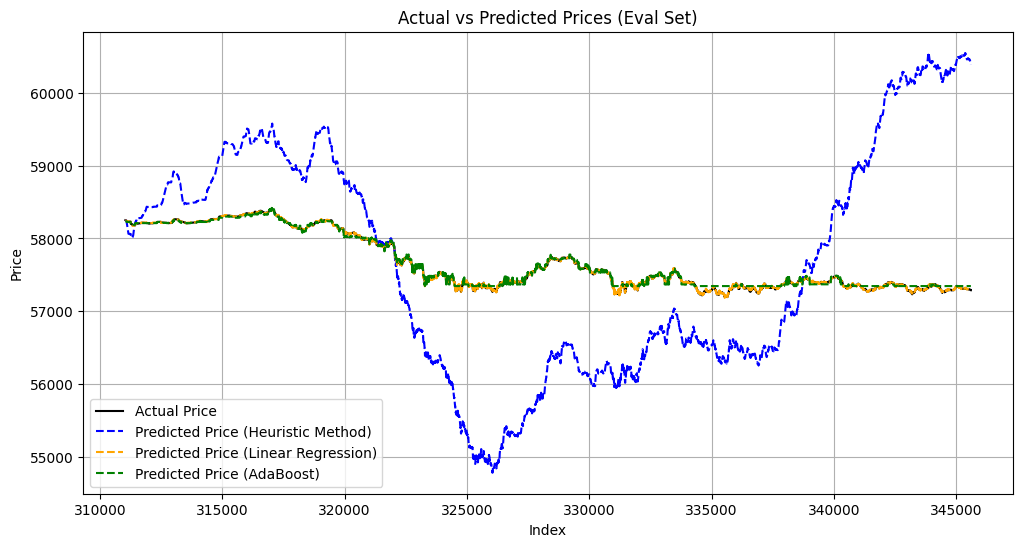

In [13]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(eval_data.index, y_eval, label="Actual Price", color="black")
plt.plot(Heuristic_Predict_data.index,Heuristic_Predict_data["predicted_price"], label="Predicted Price (Heuristic Method)", color="blue", linestyle="--")
plt.plot(eval_data.index, eval_data["predicted_lr"], label="Predicted Price (Linear Regression)", color="orange", linestyle="--")
plt.plot(eval_data.index, eval_data["predicted_adaboost"], label="Predicted Price (AdaBoost)", color="green", linestyle="--")
plt.title("Actual vs Predicted Prices (Eval Set)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
